# Sprint0授業前課題 機械学習スクラッチ入門

## 課題の目的

- pyファイルを扱うことに慣れる
- 機械学習スクラッチの準備をする

# 【問題1】train_test_splitのスクラッチ

- まずはスクラッチの練習として、scikit-learnのtrain_test_splitを自作する。
- Jupyter Notebookでコーディングを進め、完成後はpyファイルとする。
- utilsディレクトリの中にsplit.pyを作成する。

 [sklearn.model_selection.train_test_split — scikit-learn 0.20.0 documentation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [1]:
import sys

sys.path.append("/Users/makintosh/diveintocode-term1/ml-scratch")

from utils import split

# 【問題2】 分類パイプラインの作成

分類は3種類の手法を扱う。pyファイルで実行できる分類のパイプラインを作成すること。

- ロジスティック回帰
- SVM
- 決定木

データセットは3種類用意する。

1つ目は事前学習期間同様にirisデータセット。

 [sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation]()

2値分類としたいため、以下の2つの目的変数のみ利用する。特徴量は4種類全て使います。

- virgicolorとvirginica

また、残り2つは可視化が可能な特徴量が2つのデータセットを人工的に用意する。

In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, auc, roc_curve
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# irisデータセット
from sklearn import datasets

# インスタンスの生成
iris = datasets.load_iris()

# データフレームの生成
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df["target"] = iris.target

# 先頭５行を表示
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# 2値分類とするため、targetからvirgicolor(value:1)とvirginica(value:2)を抽出する
df = df[df.target != 0]

# 説明変数(x)、目的変数（y)に分解する
X = df.drop("target", axis=1)
y = df.target

In [5]:
# データの分割
X_train, X_test, y_train, y_test = split.train_test_split(X, y)

In [6]:
# 標準化
ss = StandardScaler()
ss.fit(X_train)

X_train_std = ss.transform(X_train)
X_test_std = ss.transform(X_test)

In [7]:
# 機械学習モデルをリストに格納
models = []
models.append(("LR", LogisticRegression())) # ロジスティック回帰
models.append(("SVM", SVC())) # サポートベクターマシン
models.append(("DTC", DecisionTreeClassifier())) # 決定木

# 複数のclassifierの適用
results = []
names = []

for name, model in models:
    
    model.fit(X_train_std, y_train) # 学習
    
    result = cross_val_score(model, X_train_std, y_train, scoring="roc_auc")
    names.append(name)
    results.append(result)
    
# 適用したclassifierのスコア表示
for i in range(len(names)):
    print("[classifier : {0}]  auc : {1}".format(names[i], np.round(results[i].mean(),3)))

[classifier : LR]  auc : 0.994
[classifier : SVM]  auc : 0.99
[classifier : DTC]  auc : 0.899


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be change

### シンプルデータセット１の分類

In [8]:
# シンプルデータセット１
import numpy as np

np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X1 = np.concatenate((f0, f1))
y1 = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X1 = X1[random_index]
y1 = y1[random_index]

In [9]:
# シンプルデータセット1を分類する
X_train1, X_test1, y_train1, y_test1 = split.train_test_split(X1, y1)

In [10]:
# 標準化
ss = StandardScaler()
ss.fit(X_train1)

X_train1_std = ss.transform(X_train1)
X_test1_std = ss.transform(X_test1)

In [11]:
# 機械学習モデルをリストに格納
models = []
models.append(("LR", LogisticRegression())) # ロジスティック回帰
models.append(("SVM", SVC())) # サポートベクターマシン
models.append(("DTC", DecisionTreeClassifier())) # 決定木

# 複数のclassifierの適用
results = []
names = []
y_preds1 = {}

for name, model in models:
    
    model.fit(X_train1_std, y_train1) # 学習
    
    y_pred = model.predict(X_test1_std) # 予測
    y_preds1[name] = y_pred
    
    result = cross_val_score(model, X_train_std, y_train, scoring="roc_auc")
    names.append(name)
    results.append(result)
    
# 適用したclassifierのスコア表示
for i in range(len(names)):
    print("[classifier : {0}]  auc : {1}".format(names[i], np.round(results[i].mean(),3)))

[classifier : LR]  auc : 0.994
[classifier : SVM]  auc : 0.99
[classifier : DTC]  auc : 0.899


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be change

In [12]:
y_preds1

{'LR': array([ 1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
         1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,
         1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1,
        -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
         1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,
         1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1]),
 'SVM': array([ 1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
         1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,
         1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1,
        -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
         1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,
         1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1]),
 'DTC': array([ 1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
    

In [13]:
# 正解値と予測値を格納したデータフレームを作成
df_sample1 = pd.DataFrame(X_test1_std, columns = ["factor1", "factor2"])

df_sample1["y_true"] = y_test1

for key, value in y_preds1.items():
    df_sample1[key] = value

In [14]:
# 可視化
import matplotlib.pyplot as plt
import seaborn as sns

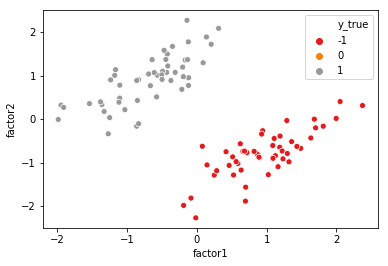

In [15]:
# 正解値
sns.scatterplot(x = "factor1", y = "factor2", hue = "y_true" , data = df_sample1, palette = "Set1")

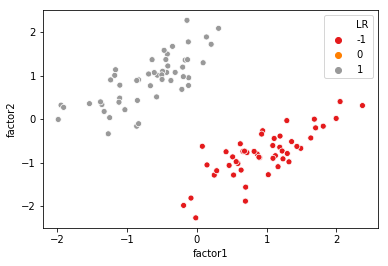

In [16]:
# ロジスティック回帰
sns.scatterplot(x = "factor1", y = "factor2", hue = "LR" , data = df_sample1, palette = "Set1")

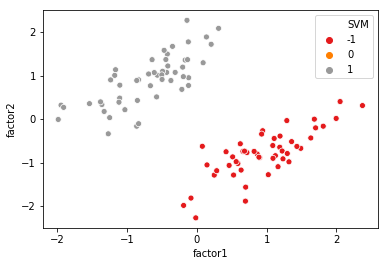

In [17]:
# サポートベクターマシン
sns.scatterplot(x = "factor1", y = "factor2", hue = "SVM" , data = df_sample1, palette = "Set1")

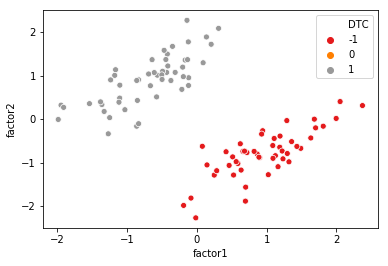

In [18]:
# 決定木
sns.scatterplot(x = "factor1", y = "factor2", hue = "DTC" , data = df_sample1, palette = "Set1")

### シンプルデータセット２の分類

In [19]:
# シンプルデータセット２作成コード
X2 = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])

y2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
# シンプルデータセット2を分類する
X_train2, X_test2, y_train2, y_test2 = split.train_test_split(X2, y2)

In [21]:
#print(X_train2)
#print(X_test2)
#print(y_train2)
#print(y_test2)

In [22]:
# 標準化
ss = StandardScaler()
ss.fit(X_train2)

X_train2_std = ss.transform(X_train2)
X_test2_std = ss.transform(X_test2)

In [23]:
# 機械学習モデルをリストに格納
models = []
models.append(("LR", LogisticRegression())) # ロジスティック回帰
models.append(("SVM", SVC())) # サポートベクターマシン
models.append(("DTC", DecisionTreeClassifier())) # 決定木

# 複数のclassifierの適用
results = []
names = []
y_preds2 = {}

for name, model in models:
    
    model.fit(X_train2_std, y_train2) # 学習
    
    y_pred = model.predict(X_test2_std) # 予測
    y_preds2[name] = y_pred
    
    result = cross_val_score(model, X_train_std, y_train, scoring="roc_auc")
    names.append(name)
    results.append(result)
    
# 適用したclassifierのスコア表示
for i in range(len(names)):
    print("[classifier : {0}]  auc : {1}".format(names[i], np.round(results[i].mean(),3)))

[classifier : LR]  auc : 0.994
[classifier : SVM]  auc : 0.99
[classifier : DTC]  auc : 0.822


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be change

In [24]:
y_preds2

{'LR': array([0, 0, 0, 1, 0, 1, 1, 1]),
 'SVM': array([0, 1, 0, 1, 0, 1, 0, 1]),
 'DTC': array([0, 1, 1, 1, 1, 1, 0, 1])}

In [25]:
# 正解値と予測値を格納したデータフレームを作成
df_sample2 = pd.DataFrame(X_test2_std, columns = ["factor1", "factor2"])

df_sample2["y_true"] = y_test2

for key, value in y_preds2.items():
    df_sample2[key] = value

## 可視化

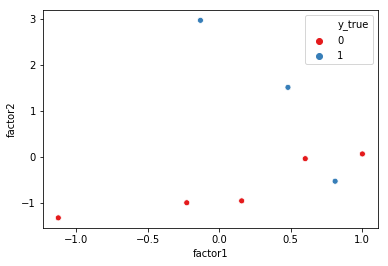

In [26]:
# 正解値
sns.scatterplot(x = "factor1", y = "factor2", hue = "y_true" , data = df_sample2, palette = "Set1")

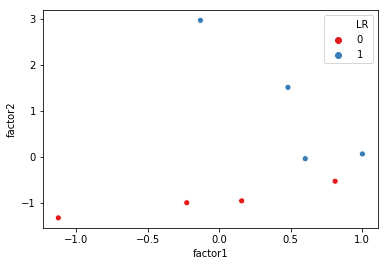

In [27]:
# ロジスティック回帰
sns.scatterplot(x = "factor1", y = "factor2", hue = "LR" , data = df_sample2, palette = "Set1")

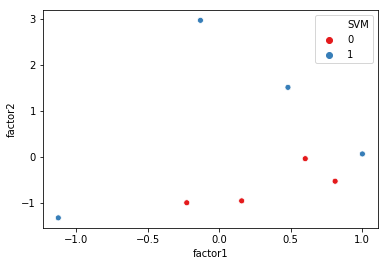

In [28]:
# サポートベクターマシン
sns.scatterplot(x = "factor1", y = "factor2", hue = "SVM" , data = df_sample2, palette = "Set1")

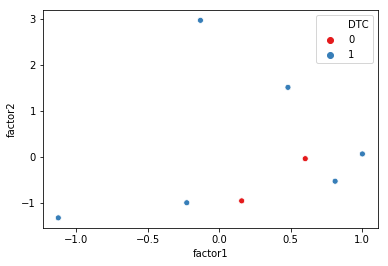

In [29]:
# 決定木
sns.scatterplot(x = "factor1", y = "factor2", hue = "DTC" , data = df_sample2, palette = "Set1")

# 【問題3】 回帰パイプラインの作成

回帰は1種類を扱う。pyファイルで実行できる回帰のパイプラインを作成すること。

- 線形回帰

データセットは事前学習期間同様にHouse Pricesコンペティションのものを使う。

[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

train.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使うこと。

In [30]:
# 住宅価格（HP : House Price）に関するデータフレームを生成する
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [31]:
# 目的変数としてSalePrice、説明変数としてGrLivAreaとYearBuiltを抽出する
df_HP = df.loc[:, ["GrLivArea", "YearBuilt", "SalePrice"]]
df_HP.head() # 先頭5行を表示

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [32]:
# 欠損値判定
df_HP.isnull().any()

GrLivArea    False
YearBuilt    False
SalePrice    False
dtype: bool

In [33]:
df_HP.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [34]:
# 説明変数(x)、目的変数（y）に分解する

X_HP = df_HP.loc[:, ["GrLivArea", "YearBuilt"]].values
y_HP = df_HP.loc[:, ["SalePrice"]].values.reshape(-1, 1)

In [35]:
# データを分割する
X_HP_train, X_HP_test, y_HP_train, y_HP_test = split.train_test_split(X_HP, y_HP)

In [36]:
# 標準化
ss1 = StandardScaler()

# 説明変数
ss1.fit(X_HP_train)

X_HP_train_std = ss1.transform(X_HP_train)
X_HP_test_std = ss1.transform(X_HP_test)

# 目的変数
ss2 = StandardScaler()
ss2.fit(y_HP_train.reshape(-1,1))

y_HP_train_std = ss2.transform(y_HP_train)
y_HP_test_std = ss2.transform(y_HP_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by Stand

In [37]:
# 線形回帰を行う
from sklearn.linear_model import LinearRegression

# 機械学習モデルをリストに格納
models = []
models.append(("LR", LinearRegression())) # 線形回帰


# 複数のclassifierの適用
y_HP_preds = {} # モデル名、予測値を格納する空辞書
y_HP_residual_error = {} # モデル名、残差を格納する空辞書
R2 = {} # モデル名、決定係数を格納する空辞書

for name, model in models:
    
    model.fit(X_HP_train_std, y_HP_train_std) # 学習
    
    y_HP_pred = model.predict(X_HP_test_std) # 予測
    
    y_HP_preds[name] = y_HP_pred # 予測値を辞書に格納
    
    y_HP_residual_error["residual_error_" + name] = y_HP_test_std - y_HP_pred # 残差を辞書に格納
    
    R2["R2_" + name] = round(model.score(X_HP_test_std, y_HP_test_std),2) # 決定係数を辞書に格納

In [38]:
R2

{'R2_LR': 0.68}

In [39]:
"""
正解値と予測値を格納したデータフレームを作成
"""

# 検証データ（説明変数）
df_HP_graph = pd.DataFrame(X_HP_test_std, columns = ["GrLivArea", "YearBuilt"])

# 検証データ（正解値）
df_HP_graph["y_true"] = y_HP_test_std

# 検証データ（予測値）
for key, value in y_HP_preds.items():
    df_HP_graph[key] = value
    
# 残差
for key, value in y_HP_residual_error.items():
    df_HP_graph[key] = value

df_HP_graph.head()


,GrLivArea,YearBuilt,y_true,LR,residual_error_LR
0,-0.843194,-0.690969,-0.509689,-0.800366,0.290677
1,-0.750904,-0.723751,-0.962687,-0.757796,-0.204891
2,0.518085,0.980896,0.570538,0.722870,-0.152331
3,-0.260613,0.030228,0.225397,-0.146107,0.371504
4,-0.860498,0.194136,-0.703831,-0.443236,-0.260595


R2 : 0.68


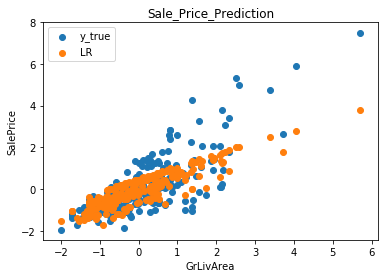

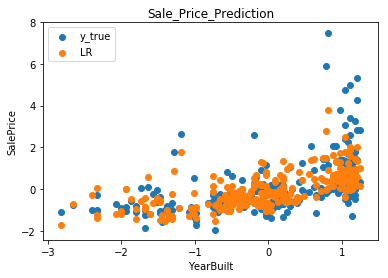

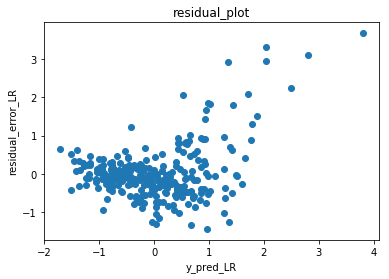

In [40]:
"""
予測値、正解値の可視化
"""
# 説明変数
variables = ["GrLivArea", "YearBuilt"]

# 目的変数
y_true = df_HP_graph["y_true"].values # 正解値

# モデル
models = ["LR"]

# 可視化
for model in models:
    print("R2 : {}".format(R2["R2_" + model])) # 決定係数の表示
    
    for variable in variables:
        plt.scatter(df_HP_graph[variable].values, y_true, label = "y_true")
        plt.scatter(df_HP_graph[variable].values, df_HP_graph[model].values, label = model)
        plt.xlabel(variable)
        plt.ylabel("SalePrice")
        plt.title("Sale_Price_Prediction")
        plt.legend()
        plt.show()
    
# 残差プロット（x：予測値、y：残差）
for model in models:
    plt.scatter(df_HP_graph[model].values, df_HP_graph["residual_error_" + model].values)
    plt.xlabel("y_pred_" + model)
    plt.ylabel("residual_error_" + model)
    plt.title("residual_plot")
    plt.show()

- 残差プロットを観察すると、概ね（予測値、残差）　＝ (0, 0)近辺にプロットが集まっているが、予測値が大きい領域（y_pred_LR > 2）では未だ残差が大きい。


- 残差プロットの分布状況は、モデルの決定係数（0.68）と整合的な感じはする。

# 本課題の学び

- スクラッチで実装することにより、何気なく使っていたライブラリやモジュールに対する理解が深まった。ライブラリのソースコードを読むことに対する抵抗感が薄れてきた気がする。


- scikit-learnのtrain_test_splitには、引数に与える配列の要素が数値だけではなく文字列も渡すことできた。機械学習を行う上では、数値データであるべきだと考えるので、データ型のチェックはもう少し厳密に行うべきではないかと思う。（実務では、引数のエラーチェックだけでも膨大なテストが必要となるのだろう）


- いずれにせよ、色々なシナリオを思い描いてテストを重ねることが重要であると気付かされた。

### 備忘１：乱数の生成、ランダムな要素の取得について

1. モジュール : 以下の２つが選択肢。
    - random : 
    - numpy.random : 


2. ランダムに要素を取得する方法：取得する値の重複のあり、なしが重要。

    - ランダムに要素を一つ選択: random.choice()
    - ランダムに複数の要素を選択（重複なし）: random.sample()
    - ランダムに複数の要素を選択（重複あり）: random.choices()
    - 乱数シードを固定

    [Pythonでリストからランダムに要素を選択するchoice, sample, choices](https://note.nkmk.me/python-random-choice-sample-choices/)


3. 乱数生成でシード値を設定するとは？

   - シード値を設定したのに、複数の乱数を発生させると値が異なった。何が保証されるのか良く分からず、オフィシャルドキュメントを確認した。
   - 以下は抜粋だが、要するにシード値を設定すると、シード値に対応したランダムな値の配列が生成され、それを順次参照する形で乱数を生成、値を取得しているということ。これを「後方互換」と呼ぶ。
    
    ---
    
    randomモジュールのアルゴリズムやシード処理関数のほとんどは、Python バージョン間で変更される対象となりますが、次の二点は変更されないことが保証されています:

    - 新しいシード処理メソッドが追加されたら、後方互換なシード処理器が提供されます。
    
    - 生成器の random() メソッドは、互換なシード処理器に同じシードが与えられた場合、引き続き同じシーケンスを生成します。
    
    ---
    
    [random --- 擬似乱数を生成する](https://docs.python.org/ja/3/library/random.html#random.random)

    [pythonメモ：乱数生成でシードを設定するとはどういうことなのか](https://qiita.com/HotAllure/items/ca5462b33d8b0a14631f)

### 備忘２：PandasデータをStandardScalerで標準化出来るのか検証

- Pandas.DataFrame型のデータをNumpy配列に変換せずに標準化できるのか理解が曖昧だったため、あらためて確認した。

In [41]:
"""
サンプルのNumpy配列を作り、DataFrameに格納する
"""

array = np.arange(15).reshape(5,3)

sample_df = pd.DataFrame(array, columns=["col1", "col2", "col3"])

sample_df

,col1,col2,col3
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


In [42]:
"""
StandarScaler()の引数にDataFrame型をセットして標準化できるか確認する
"""

# インスタンス生成
ss = StandardScaler()

# フィッティング
ss.fit(sample_df)

# 標準化
std_data = ss.transform(sample_df)

# 出力
std_data

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


array([[-1.41421356, -1.41421356, -1.41421356],
       [-0.70710678, -0.70710678, -0.70710678],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.70710678,  0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356,  1.41421356]])

In [43]:
# 標準化した値をデータフレームに格納、出力
sample_df_std = pd.DataFrame(std_data, columns = sample_df.columns)
sample_df_std

,col1,col2,col3
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


### 検証結果
- PandasのDataFrameもStandardScaler()の引数にできる。
- 出力はNumpy配列。 DataFrameをNumpy配列に変換して処理、出力している。